In [1]:
from Dataloader import parse_args, load_volumes, VideoMAEDataset, SimpleVideoProcessor


# Doesnt show pre and post synapse 

In [25]:
# %load_ext autoreload
# %autoreload 2
import Dataloader
from Dataloader import parse_args, main
# import dataloader
%autoreload 2


In [29]:
# Define the arguments
class Args:
    raw_base_dir = "7_bboxes_plus_seg/raw"
    seg_base_dir = "7_bboxes_plus_seg/raw"
    add_mask_base_dir = "vesicle_cloud__syn_interface__mitochondria_annotation"
    excel_file = ""
    bbox_name = ["bbox1"]
    batch_size = 2
    num_epochs = 5
    learning_rate = 1e-4
    weight_decay = 1e-2
    subvol_size = 80
    num_frames = 80
    segmentation_type = 5
    alpha = 0.3
    size=(80,80)
# Create an instance of Args
args = Args()

# Run the main function and store the results
cubes, synapse_info = main(args)


bbox1
Processed 58 cubes successfully.


In [30]:
synapse_info.head(100)

,Var1,central_coord_1,central_coord_2,central_coord_3,side_1_coord_1,side_1_coord_2,side_1_coord_3,side_2_coord_1,side_2_coord_2,side_2_coord_3,bbox_name
0,non_spine_synapsed_056,171,260,350,171,268,359,171,260,340,bbox1
1,non_spine_synapse_057,223,113,425,223,112,438,223,114,407,bbox1
2,non_spine_synapse_058,280,102,377,280,94,400,280,108,364,bbox1
3,non_spine_synapse_063,455,131,162,455,134,181,455,127,145,bbox1
4,non_spine_synapse_062,138,121,302,135,113,298,140,127,312,bbox1
5,non_spine_synapse_061,122,113,325,117,113,316,127,113,334,bbox1
6,non_spine_synapse_060,175,257,297,175,272,294,175,238,301,bbox1
7,non_spine_synapse_059,300,383,404,300,391,394,300,369,418,bbox1
8,non_spine_synapse_054,274,158,188,274,158,209,274,155,171,bbox1
9,non_spine_synapse_053,467,348,242,467,346,233,467,346,257,bbox1


In [31]:
import matplotlib.pyplot as plt

#
# Print the shape of the cubes
print(f"Cubes shape: {len(cubes)} cubes, each with shape {cubes[0].shape}")

Cubes shape: 58 cubes, each with shape torch.Size([80, 3, 80, 80])


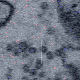

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
from IPython.display import Image, display

# Select a cube (e.g., the first one)
cube = cubes[1]  # Shape: (num_frames, 3, H, W)

# Convert the cube to a numpy array and normalize it
cube_np = cube.numpy()  # Convert to numpy
cube_np = (cube_np - cube_np.min()) / (cube_np.max() - cube_np.min())  # Normalize to [0, 1]
cube_np = (cube_np * 255).astype(np.uint8)  # Scale to [0, 255]

# Rearrange the dimensions to (num_frames, H, W, 3)
cube_np = np.transpose(cube_np, (0, 2, 3, 1))

# Create a list of frames
frames = [cube_np[i] for i in range(cube_np.shape[0])]

# Save the frames as a GIF
gif_path = "cube.gif"
imageio.mimsave(gif_path, frames, format="GIF", fps=10)  # Save with 5 frames per second

# Display the GIF in the notebook
display(Image(filename=gif_path))
